## James Ndungu
## Kurasa AI Report Summary

In [1]:
#importing necessary libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# loading the dataset
df=pd.read_csv("C:\\Users\\ADMIN\\Downloads\\learner_assessments.csv")

In [3]:
# displaying the first 5 rows
df.head()

,student_id,student_name,school,learning_area,term,assessment_type,score
0,S001,Emmanuel Wanyonyi,Mashinani Children Centre,Mathematics,2024-1,formative,33
1,S001,Emmanuel Wanyonyi,Mashinani Children Centre,Mathematics,2024-1,summative,83
2,S001,Emmanuel Wanyonyi,Mashinani Children Centre,English,2024-1,formative,65
3,S001,Emmanuel Wanyonyi,Mashinani Children Centre,English,2024-1,summative,30
4,S001,Emmanuel Wanyonyi,Mashinani Children Centre,Science,2024-1,formative,78


In [4]:
#checking structure and type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   student_id       160 non-null    object
 1   student_name     160 non-null    object
 2   school           160 non-null    object
 3   learning_area    160 non-null    object
 4   term             160 non-null    object
 5   assessment_type  160 non-null    object
 6   score            160 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 8.9+ KB


In [5]:
# checking and handling duplicates
df.duplicated().sum()

0

# there are no duplicates

In [6]:
# checking and handling missing values
df.isnull().sum()

student_id         0
student_name       0
school             0
learning_area      0
term               0
assessment_type    0
score              0
dtype: int64

# there are no missing values

In [7]:
#Average summative score per student per term
summative = df[df['assessment_type'] == 'summative']
avg_scores = summative.groupby(['student_id', 'student_name', 'term'])['score'].mean().reset_index()
print(avg_scores)


   student_id        student_name    term  score
0        S001   Emmanuel Wanyonyi  2024-1   59.6
1        S001   Emmanuel Wanyonyi  2024-2   57.2
2        S002        Faith Chebet  2024-1   63.2
3        S002        Faith Chebet  2024-2   70.4
4        S003       John Kipkoech  2024-1   81.2
5        S003       John Kipkoech  2024-2   74.2
6        S004         Mary Atieno  2024-1   55.2
7        S004         Mary Atieno  2024-2   57.0
8        S005        Brian Mwangi  2024-1   62.8
9        S005        Brian Mwangi  2024-2   70.4
10       S006       Alice Wairimu  2024-1   41.0
11       S006       Alice Wairimu  2024-2   58.2
12       S007       Daniel Omondi  2024-1   68.8
13       S007       Daniel Omondi  2024-2   82.2
14       S008  Lilian Jepchirchir  2024-1   68.6
15       S008  Lilian Jepchirchir  2024-2   72.8


In [8]:
#Calculating the difference summarative scores between terms
pivot = avg_scores.pivot(index='student_id', columns='term', values='score')
pivot['score_change'] = pivot['2024-2'] - pivot['2024-1']
print(pivot)


term        2024-1  2024-2  score_change
student_id                              
S001          59.6    57.2          -2.4
S002          63.2    70.4           7.2
S003          81.2    74.2          -7.0
S004          55.2    57.0           1.8
S005          62.8    70.4           7.6
S006          41.0    58.2          17.2
S007          68.8    82.2          13.4
S008          68.6    72.8           4.2


In [9]:
#Top 5 students in 2024-2
top5 = avg_scores[avg_scores['term'] == '2024-2'].sort_values(by='score', ascending=False).head(5)
print(top5)

   student_id        student_name    term  score
13       S007       Daniel Omondi  2024-2   82.2
5        S003       John Kipkoech  2024-2   74.2
15       S008  Lilian Jepchirchir  2024-2   72.8
3        S002        Faith Chebet  2024-2   70.4
9        S005        Brian Mwangi  2024-2   70.4


In [10]:
#Top 3 schools by average student performance in 2024-2
school_avg = summative[summative['term'] == '2024-2'].groupby('school')['score'].mean().sort_values(ascending=False).head(3)
print(school_avg)

school
Greenhill Academy            69.866667
Mashinani Children Centre    66.800000
Hekima School                66.200000
Name: score, dtype: float64


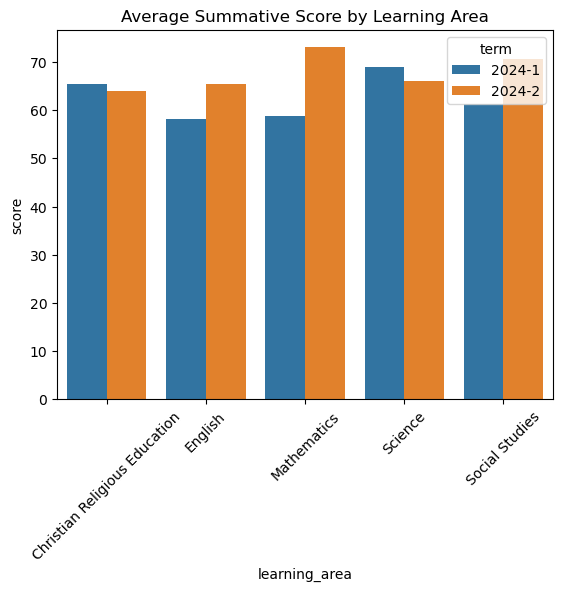

In [11]:
# A bar chart foraverage summative score per learning area by term
learning_area_avg = summative.groupby(['learning_area', 'term'])['score'].mean().reset_index()
sns.barplot(x='learning_area', y='score', hue='term', data=learning_area_avg)
plt.xticks(rotation=45)
plt.title("Average Summative Score by Learning Area")
plt.show()

# insights

# Mathematics Shows Strong Improvement

* The largest score increase occurred in Mathematics, rising from ~59 in Term 2024-1 to ~74 in Term 2024-2.

* This may reflect focused interventions, better teaching methods, or improved learner comprehension in math during the second term.

# English Performance Improved

* Scores in English improved noticeably, from around 58 to 66, showing a positive trend in language learning.

* This could be due to curriculum adjustments or increased learner engagement.

# Science and Social Studies Slightly Declined

* Science dropped from ~69 to ~66, while Social Studies saw a small decrease.

* These dips may warrant attention—potential causes could be lack of resources, reduced focus, or changes in instruction quality.

# Christian Religious Education (CRE) Remained Stable

* CRE remained relatively constant with a minor drop, indicating consistency in learner performance across terms.

# General Trend

* The overall trend suggests Term 2024-2 had stronger scores, particularly in core subjects like Math and English.

* The shift in performance across terms suggests potential for data-driven instructional adjustments going forward.

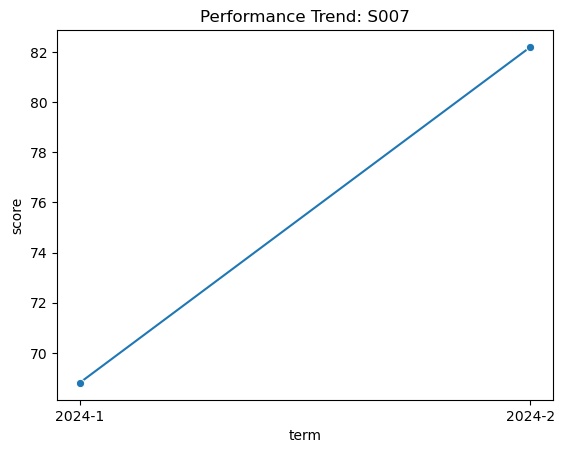

In [12]:
# A Line chart for performance trend of one student
student_id= 'S007'
student_data = summative[summative['student_id'] == student_id].groupby('term')['score'].mean().reset_index()
sns.lineplot(x='term', y='score', data=student_data, marker='o')
plt.title(f"Performance Trend: {student_id}")
plt.show()

In [13]:
#creating new colunm results
df['Result'] = df['score'].apply(lambda x: 'Pass' if x >= 60 else 'Fail')

df

,student_id,student_name,school,learning_area,term,assessment_type,score,Result
0,S001,Emmanuel Wanyonyi,Mashinani Children Centre,Mathematics,2024-1,formative,33,Fail
1,S001,Emmanuel Wanyonyi,Mashinani Children Centre,Mathematics,2024-1,summative,83,Pass
2,S001,Emmanuel Wanyonyi,Mashinani Children Centre,English,2024-1,formative,65,Pass
3,S001,Emmanuel Wanyonyi,Mashinani Children Centre,English,2024-1,summative,30,Fail
4,S001,Emmanuel Wanyonyi,Mashinani Children Centre,Science,2024-1,formative,78,Pass
...,...,...,...,...,...,...,...,...
155,S008,Lilian Jepchirchir,Mashinani Children Centre,Science,2024-2,summative,90,Pass
156,S008,Lilian Jepchirchir,Mashinani Children Centre,Social Studies,2024-2,formative,73,Pass
157,S008,Lilian Jepchirchir,Mashinani Children Centre,Social Studies,2024-2,summative,100,Pass
158,S008,Lilian Jepchirchir,Mashinani Children Centre,Christian Religious Education,2024-2,formative,36,Fail


In [14]:
df[['Year', 'TermNumber']] = df['term'].str.split('-', expand=True)
df

,student_id,student_name,school,learning_area,term,assessment_type,score,Result,Year,TermNumber
0,S001,Emmanuel Wanyonyi,Mashinani Children Centre,Mathematics,2024-1,formative,33,Fail,2024,1
1,S001,Emmanuel Wanyonyi,Mashinani Children Centre,Mathematics,2024-1,summative,83,Pass,2024,1
2,S001,Emmanuel Wanyonyi,Mashinani Children Centre,English,2024-1,formative,65,Pass,2024,1
3,S001,Emmanuel Wanyonyi,Mashinani Children Centre,English,2024-1,summative,30,Fail,2024,1
4,S001,Emmanuel Wanyonyi,Mashinani Children Centre,Science,2024-1,formative,78,Pass,2024,1
...,...,...,...,...,...,...,...,...,...,...
155,S008,Lilian Jepchirchir,Mashinani Children Centre,Science,2024-2,summative,90,Pass,2024,2
156,S008,Lilian Jepchirchir,Mashinani Children Centre,Social Studies,2024-2,formative,73,Pass,2024,2
157,S008,Lilian Jepchirchir,Mashinani Children Centre,Social Studies,2024-2,summative,100,Pass,2024,2
158,S008,Lilian Jepchirchir,Mashinani Children Centre,Christian Religious Education,2024-2,formative,36,Fail,2024,2


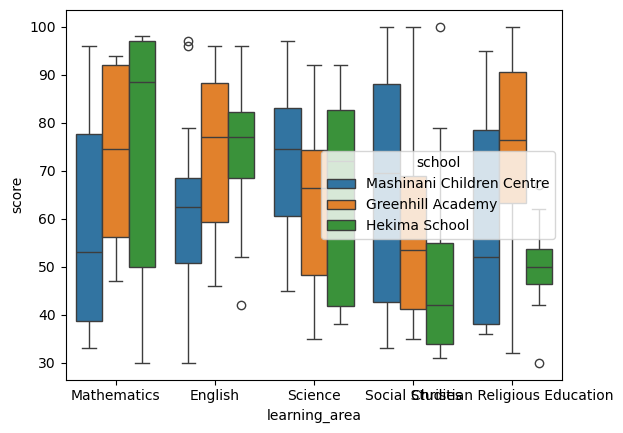

In [35]:
#Student perfomance across different Schools
import seaborn as sns
sns.boxplot(x='learning_area', y='score',hue='school', data=df)
plt.show()


In [16]:


# Pivot to get one row per student per term
df_pivot = df.pivot_table(
    index=['student_id', 'TermNumber','Year','Result'],
    columns='learning_area',
    values='score'
).reset_index()

# Merging with metadata like Name, School, Assessment Type
meta = df[['student_id', 'student_name', 'school', 'assessment_type']].drop_duplicates()
df_final = df_pivot.merge(meta, on='student_id', how='left')



In [17]:
df_final

,student_id,TermNumber,Year,Result,Christian Religious Education,English,Mathematics,Science,Social Studies,student_name,school,assessment_type
0,S001,1,2024,Fail,38.0,30.0,33.0,NaN,42.5,Emmanuel Wanyonyi,Mashinani Children Centre,formative
1,S001,1,2024,Fail,38.0,30.0,33.0,NaN,42.5,Emmanuel Wanyonyi,Mashinani Children Centre,summative
2,S001,1,2024,Pass,62.0,65.0,83.0,79.5,NaN,Emmanuel Wanyonyi,Mashinani Children Centre,formative
3,S001,1,2024,Pass,62.0,65.0,83.0,79.5,NaN,Emmanuel Wanyonyi,Mashinani Children Centre,summative
4,S001,2,2024,Fail,51.0,41.0,NaN,56.0,NaN,Emmanuel Wanyonyi,Mashinani Children Centre,formative
...,...,...,...,...,...,...,...,...,...,...,...,...
59,S008,1,2024,Pass,94.0,62.5,NaN,97.0,NaN,Lilian Jepchirchir,Mashinani Children Centre,summative
60,S008,2,2024,Fail,37.0,56.0,47.0,NaN,NaN,Lilian Jepchirchir,Mashinani Children Centre,formative
61,S008,2,2024,Fail,37.0,56.0,47.0,NaN,NaN,Lilian Jepchirchir,Mashinani Children Centre,summative
62,S008,2,2024,Pass,NaN,96.0,80.0,80.5,86.5,Lilian Jepchirchir,Mashinani Children Centre,formative


In [18]:
# Label encoding
df_final['student_id'] = df_final['student_id'].astype('category').cat.codes
df_final['TermNumber'] = df_final['TermNumber'].astype('category').cat.codes


In [19]:
from sklearn.model_selection import train_test_split

X = df_final[['student_id', 'TermNumber']]
subject_columns = [col for col in df_pivot.columns if col not in ['student_id', 'TermNumber']]
y = df_final[subject_columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
# Converting to numeric and safely fill NaNs with mean
for col in subject_columns:
    df_final[col] = pd.to_numeric(df_final[col], errors='coerce')
    df_final[col] = df_final[col].fillna(df_final[col].mean())





In [37]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())


student_id    0
TermNumber    0
dtype: int64
Christian Religious Education    0
English                          0
Mathematics                      0
Science                          0
Social Studies                   0
dtype: int64


In [38]:
from sklearn.ensemble import RandomForestRegressor
# Clean X
X_train = X_train.select_dtypes(include='number')
X_train = X_train.fillna(0)

# Clean y (for regression)
y_train = y_train.select_dtypes(include='number')
y_train = y_train.fillna(y_train.mean())

# Fit the model
model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [39]:
print(X_test.columns.tolist())



['student_id', 'TermNumber']


In [40]:
predictions = model.predict(X_test)
# Automatically generating matching number of predicted column names
predicted_columns = [col + '_Predicted' for col in subject_columns[:predictions.shape[1]]]

# Creating the predictions DataFrame
predicted_df = pd.DataFrame(predictions, columns=predicted_columns)



In [41]:
predicted_df

,Christian Religious Education_Predicted,English_Predicted,Mathematics_Predicted,Science_Predicted,Social Studies_Predicted
0,62.668219,59.347274,85.841641,79.391948,85.560132
1,70.858140,66.867175,54.267158,74.102745,50.661928
2,54.859929,53.571583,66.653507,75.082777,55.035096
3,58.386398,73.091667,73.323571,73.756876,54.221479
4,65.879514,56.768262,74.429562,77.305238,73.495846
5,73.887595,71.258452,69.582719,57.001298,77.914658
6,58.390660,78.242125,84.239990,71.355900,76.426894
7,82.374251,77.321060,74.679861,56.452857,53.898699
8,64.735456,66.962952,61.718459,66.117647,67.600869
9,56.468467,83.349048,71.255974,76.767954,78.959097


In [42]:
predictions

array([[62.66821857, 59.34727381, 85.84164137, 79.39194762, 85.56013203],
       [70.85813968, 66.8671746 , 54.2671584 , 74.10274524, 50.66192821],
       [54.85992857, 53.57158333, 66.65350744, 75.08277738, 55.03509632],
       [58.3863981 , 73.09166667, 73.32357143, 73.75687619, 54.22147944],
       [65.87951429, 56.7682619 , 74.4295625 , 77.3052381 , 73.49584632],
       [73.88759524, 71.25845238, 69.58271875, 57.00129762, 77.91465801],
       [58.39066   , 78.242125  , 84.23998958, 71.3559    , 76.42689394],
       [82.37425143, 77.32105952, 74.67986111, 56.45285714, 53.89869913],
       [64.73545635, 66.96295238, 61.71845941, 66.11764683, 67.60086905],
       [56.46846714, 83.34904762, 71.25597371, 76.76795357, 78.9590974 ],
       [70.85813968, 66.8671746 , 54.2671584 , 74.10274524, 50.66192821],
       [81.66563429, 68.31727679, 81.14721429, 58.89458571, 65.24225649],
       [58.20966667, 69.0920119 , 72.33344643, 66.3362    , 49.55088745]])


📘 Report for: Mary Atieno | Term: 1 | Assessment: formative
✅ Average Score: 62.68 → Result: Pass

                               Predicted Score
Christian Religious Education        71.654624
English                              73.099881
Mathematics                          57.976677
Science                              59.618810
Social Studies                       51.044048


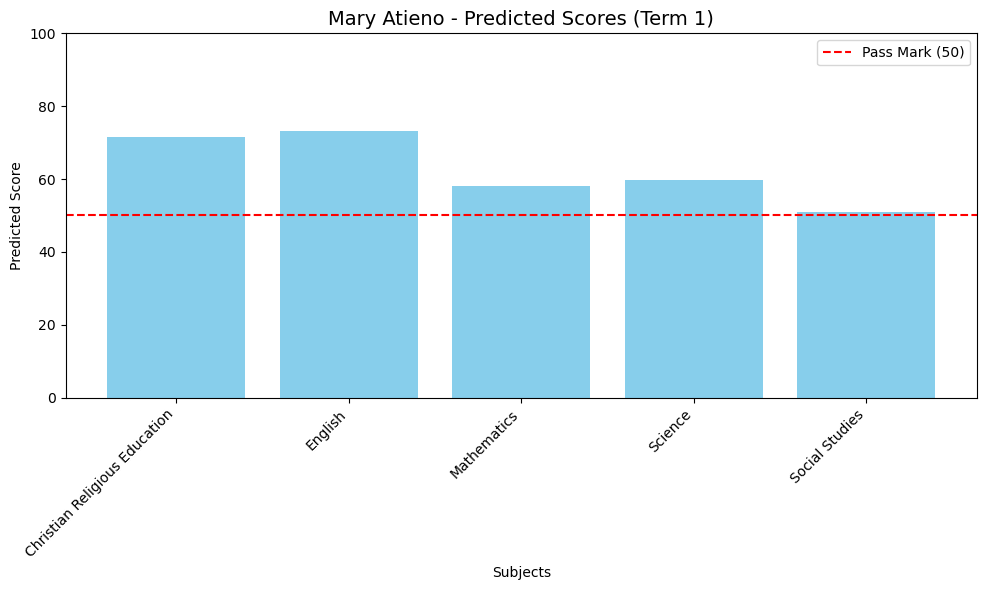

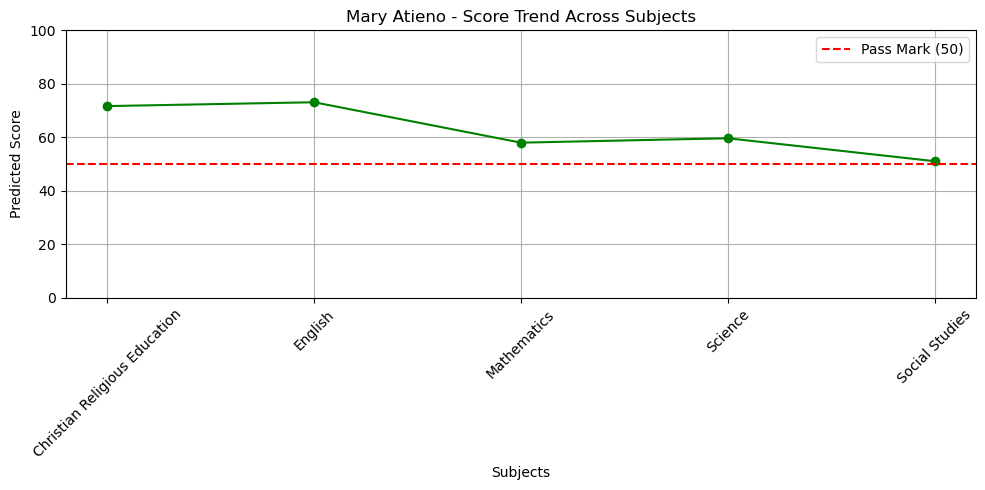

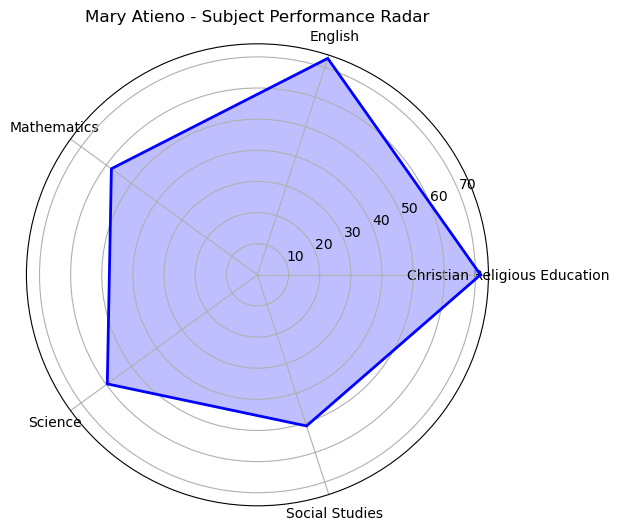


🏆 Best Subject: English (73.1)
⚠️  Weakest Subject: Social Studies (51.0)



In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Defining columns
excluded_cols = ['student_id', 'TermNumber', 'student_name', 'assessment_type','Year','Result']
subject_columns = [
    col for col in df_final.columns
    if col not in excluded_cols and pd.api.types.is_numeric_dtype(df_final[col])
]

# Cleaning data
df_clean = df_final.copy()
df_clean[subject_columns] = df_clean[subject_columns].apply(pd.to_numeric, errors='coerce')
for col in subject_columns:
    mean_val = df_clean[col].mean()
    df_clean[col] = df_clean[col].fillna(mean_val if not pd.isna(mean_val) else 0)

# FEATURES & TARGETS 
X = df_clean[['student_id', 'TermNumber']]
y = df_clean[subject_columns]

# One-hot encode student_id
preprocessor = ColumnTransformer(
    transformers=[('id', OneHotEncoder(handle_unknown='ignore'), ['student_id'])],
    remainder='passthrough'
)

# MODEL PIPELINE 
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
model.fit(X_train, y_train)

# PREDICTION & REPORT
# Inputs
input_student_id = 3
input_term = 1

# Match student row
student_match = df_clean[
    (df_clean['student_id'] == input_student_id) &
    (df_clean['TermNumber'] == input_term)
]

if not student_match.empty:
    # Predict
    input_data = student_match[['student_id', 'TermNumber']]
    prediction = model.predict(input_data)[0]
    prediction = np.clip(prediction, 0, 100)  # clamp to 0–100

    # Extract info
    student_info = student_match.iloc[0]
    student_name = student_info.get('student_name', 'Unknown')
    assessment_type = student_info.get('assessment_type', 'Unknown')

    # Report data
    subject_scores = dict(zip(subject_columns, prediction))
    avg_score = sum(prediction) / len(prediction)
    result = 'Pass' if avg_score >= 50 else 'Fail'

    print(f"\n📘 Report for: {student_name} | Term: {input_term} | Assessment: {assessment_type}")
    print(f"✅ Average Score: {round(avg_score, 2)} → Result: {result}\n")

    report_df = pd.DataFrame.from_dict(subject_scores, orient='index', columns=['Predicted Score'])
    print(report_df)

    # Bar Chart 
    plt.figure(figsize=(10, 6))
    plt.bar(subject_scores.keys(), subject_scores.values(), color='skyblue')
    plt.axhline(50, color='red', linestyle='--', label='Pass Mark (50)')
    plt.title(f"{student_name} - Predicted Scores (Term {input_term})", fontsize=14)
    plt.xlabel("Subjects")
    plt.ylabel("Predicted Score")
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 100)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Line Chart
    plt.figure(figsize=(10, 5))
    plt.plot(subject_scores.keys(), subject_scores.values(), marker='o', linestyle='-', color='green')
    plt.axhline(50, color='red', linestyle='--', label='Pass Mark (50)')
    plt.title(f"{student_name} - Score Trend Across Subjects")
    plt.xlabel("Subjects")
    plt.ylabel("Predicted Score")
    plt.xticks(rotation=45)
    plt.ylim(0, 100)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Radar Chart 
    categories = list(subject_scores.keys())
    values = list(subject_scores.values())
    values += values[:1]  # repeat first value
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, values, color='blue', linewidth=2)
    ax.fill(angles, values, color='blue', alpha=0.25)
    ax.set_thetagrids(np.degrees(angles[:-1]), categories)
    plt.title(f"{student_name} - Subject Performance Radar")
    plt.show()

    # === Top/Bottom Subjects ===
    sorted_scores = sorted(subject_scores.items(), key=lambda x: x[1], reverse=True)
    top_subject, top_score = sorted_scores[0]
    bottom_subject, bottom_score = sorted_scores[-1]

    print(f"\n🏆 Best Subject: {top_subject} ({top_score:.1f})")
    print(f"⚠️  Weakest Subject: {bottom_subject} ({bottom_score:.1f})\n")

else:
    print("❌ No data found for the given student_id and TermNumber.")


In [44]:

custom_input = pd.DataFrame({
    'student_id': [3],      
    'TermNumber': [1]          
})

# Predict using model
custom_prediction = model.predict(custom_input)

# Formating prediction output
custom_pred_df = pd.DataFrame(custom_prediction, columns=[col + '_Predicted' for col in subject_columns])

# Compute average and pass/fail
custom_pred_df['Average_Predicted_Score'] = custom_pred_df.mean(axis=1)
custom_pred_df['Result_Predicted'] = custom_pred_df['Average_Predicted_Score'].apply(lambda x: 'Pass' if x >= 50 else 'Fail')

#  Lookup student_name and assessment_type from original dataset
match = df_clean[
    (df_clean['student_id'] == custom_input['student_id'].iloc[0]) &
    (df_clean['TermNumber'] == custom_input['TermNumber'].iloc[0])
]

# If match found, use actual name/type; else fallback
if not match.empty:
    student_name = match['student_name'].iloc[0]
    assessment_type = match['assessment_type'].iloc[0]
else:
    student_name = 'Unknown'
    assessment_type = 'Unknown'

# Add metadata
custom_pred_df.insert(0, 'assessment_type', assessment_type)
custom_pred_df.insert(0, 'student_name', student_name)

# Show result
custom_pred_df.head()


,student_name,assessment_type,Christian Religious Education_Predicted,English_Predicted,Mathematics_Predicted,Science_Predicted,Social Studies_Predicted,Average_Predicted_Score,Result_Predicted
0,Mary Atieno,formative,71.654624,73.099881,57.976677,59.61881,51.044048,62.678808,Pass


In [30]:
pip install openpyxl xlsxwriter


Note: you may need to restart the kernel to use updated packages.


In [45]:
import os
import pandas as pd
import xlsxwriter

# === Step 1: Create output folder ===
output_folder = "1_reports"
os.makedirs(output_folder, exist_ok=True)

# === Step 2: Loop through each student ===
for student_id in df_clean['student_id'].unique():
    student_df = df_clean[df_clean['student_id'] == student_id]
    student_name = student_df['student_name'].iloc[0]
    safe_name = student_name.replace(" ", "_").replace("/", "_")  # Make filename safe

    all_term_data = []

    for term in student_df['TermNumber'].unique():
        # Input data for prediction
        input_data = pd.DataFrame([[student_id, term]], columns=['student_id', 'TermNumber'])
        prediction = model.predict(input_data)[0]

        # Extract metadata
        assessment_type = student_df[student_df['TermNumber'] == term]['assessment_type'].iloc[0]
        subject_scores = dict(zip(subject_columns, prediction))

        # Compute result
        average_score = sum(prediction) / len(prediction)
        result = "Pass" if average_score >= 50 else "Fail"

        # Record data
        term_data = {
            "TermNumber": term,
            "Assessment Type": assessment_type,
            "Average Score": round(average_score, 2),
            "Result": result,
            **subject_scores
        }

        all_term_data.append(term_data)

    # Convert to DataFrame
    student_report_df = pd.DataFrame(all_term_data)

    # Step 3: Writing to Excel with chart
    filename = f"{output_folder}/Student_{safe_name}_Report.xlsx"
    with pd.ExcelWriter(filename, engine='xlsxwriter') as writer:
        student_report_df.to_excel(writer, sheet_name='Report', index=False)
        workbook = writer.book
        worksheet = writer.sheets['Report']

        # Add bar chart for first term only
        chart = workbook.add_chart({'type': 'column'})

        if len(student_report_df) > 0:
            # Only build chart for first row 
            row_offset = 1  
            for i, subject in enumerate(subject_columns):
                chart.add_series({
                    'name':       subject,
                    'categories': ['Report', 0, 4, 0, 4 + len(subject_columns) - 1],
                    'values':     ['Report', row_offset, 4 + i, row_offset, 4 + i],
                })

            chart.set_title({'name': f'Predicted Subject Scores (Term {student_report_df.loc[0, "TermNumber"]})'})
            chart.set_x_axis({'name': 'Subjects'})
            chart.set_y_axis({'name': 'Score'})
            worksheet.insert_chart('B15', chart)

print(" Enhanced reports (with charts) saved in 'student_reports' folder.")


✅ Enhanced reports (with charts) saved in 'student_reports' folder.


2025-06-16 15:34:50.085 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-06-16 15:34:50.090 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-06-16 15:34:50.090 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 15:34:51.033 
  command:

    streamlit run C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-06-16 15:34:51.036 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 15:34:51.037 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 15:34:51.062 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 15:34:51.064 Thread '

DeltaGenerator()

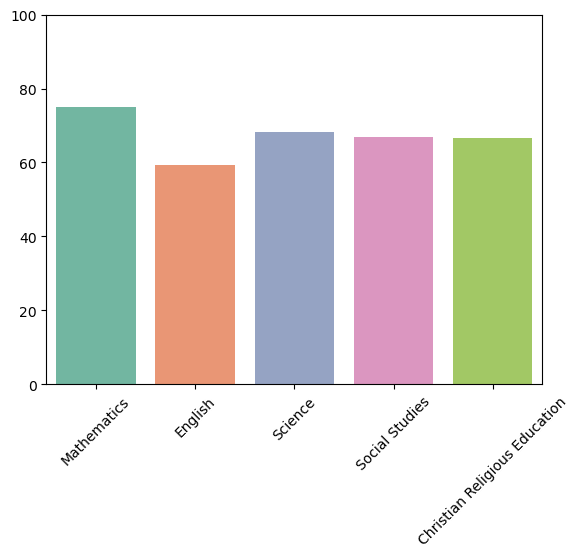

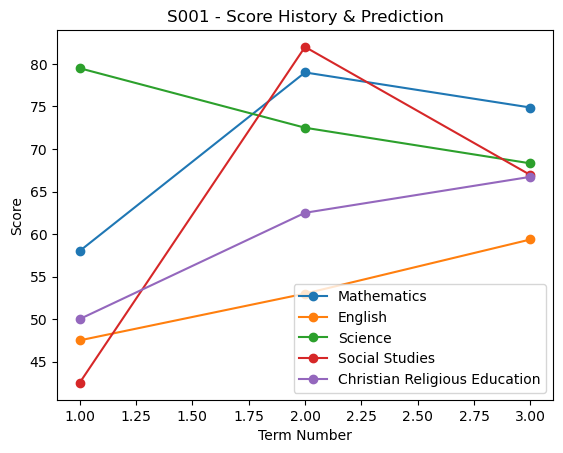

In [32]:
import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# ----------------------------
# Load and Prepare Data
# ----------------------------

@st.cache_data
def load_and_transform_data():
    df = pd.read_csv("C:\\Users\\ADMIN\\Downloads\\learner_assessments.csv")

    # Combine scores by average (formative + summative)
    df['term'] = df['term'].astype(str)
    df_grouped = df.groupby(['student_id', 'term', 'learning_area']).agg({'score': 'mean'}).reset_index()

    # Pivot to wide format: one row per student per term, one column per subject
    df_wide = df_grouped.pivot_table(index=['student_id', 'term'], columns='learning_area', values='score').reset_index()

    # Extract year and term number
    df_wide[['year', 'term_number']] = df_wide['term'].str.split('-', expand=True)
    df_wide['term_number'] = pd.to_numeric(df_wide['term_number'], errors='coerce')

    # Encode student_id
    le = LabelEncoder()
    df_wide['student_encoded'] = le.fit_transform(df_wide['student_id'])

    return df_wide, le, df['learning_area'].unique().tolist()

df_wide, le, subject_columns = load_and_transform_data()

# ----------------------------
# Model Training


# Remove rows with missing target values
df_model = df_wide.dropna(subset=subject_columns, how='any')

X = df_model[['student_encoded', 'term_number']]
y = df_model[subject_columns]

if X.empty or y.empty:
    st.error("❌ Not enough data to train the model.")
    st.stop()

model = RandomForestRegressor(random_state=42)
model.fit(X, y)


# Streamlit Interface


st.title("📚 Student Score Predictor")

students = df_wide['student_id'].unique()
selected_student = st.selectbox("Select student:", students)

student_df = df_wide[df_wide['student_id'] == selected_student]
if student_df.empty:
    st.warning("No data found for selected student.")
    st.stop()

latest_term = student_df['term_number'].max()
next_term = latest_term + 1

encoded_id = le.transform([selected_student])[0]
X_new = pd.DataFrame([[encoded_id, next_term]], columns=['student_encoded', 'term_number'])

prediction = model.predict(X_new)[0]
predicted_scores = dict(zip(subject_columns, prediction))


# Output: Table + Bar Plot


st.header(f"🎯 Predicted Scores for Term {next_term}")
st.dataframe(pd.DataFrame(predicted_scores.items(), columns=["Subject", "Predicted Score"]))

st.subheader("📊 Predicted Scores Bar Chart")
fig, ax = plt.subplots()
sns.barplot(x=list(predicted_scores.keys()), y=list(predicted_scores.values()), ax=ax, palette="Set2")
plt.xticks(rotation=45)
ax.set_ylim(0, 100)
st.pyplot(fig)


# Output: Historical Line Plot


st.subheader("📈 Score Progression Over Time")

student_history = student_df.copy()
predicted_row = {'student_encoded': encoded_id, 'term_number': next_term}
predicted_row.update(predicted_scores)
student_history = pd.concat([
    student_history,
    pd.DataFrame([predicted_row])
], ignore_index=True)

student_history.sort_values("term_number", inplace=True)

fig2, ax2 = plt.subplots()
for subject in subject_columns:
    if subject in student_history:
        ax2.plot(student_history["term_number"], student_history[subject], label=subject, marker='o')

ax2.set_xlabel("Term Number")
ax2.set_ylabel("Score")
ax2.set_title(f"{selected_student} - Score History & Prediction")
ax2.legend()
st.pyplot(fig2)
